# 2. Visualitation

In this notebook, I will plot different graphis to understant the data and its seasonality.

In [4]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
summed_data = pd.read_parquet("../data/02_intermediate/summed_data.parquet")
data = pd.read_parquet("../data/02_intermediate/data.parquet")
data

,settlement_period,period_hour,tsd,is_holiday
settlement_date,,,,
2009-01-01 00:00:00,1,0:00:00,38704,1
2009-01-01 00:30:00,2,0:30:00,38964,1
2009-01-01 01:00:00,3,1:00:00,38651,1
2009-01-01 01:30:00,4,1:30:00,37775,1
2009-01-01 02:00:00,5,2:00:00,37298,1
...,...,...,...,...
2023-04-25 21:30:00,44,21:30:00,31142,0
2023-04-25 22:00:00,45,22:00:00,29292,0
2023-04-25 22:30:00,46,22:30:00,27807,0


Three differents ways of plotting the same graphic.
1. In the first plot, we put a dot for the holidays, but the height is not the correct for the obsevation.
2. In the second plot, we differentiate the normal days from the holidays, but since we have 48 observations per day, it appears to be straight lines.
3. We do the plot, differentiating the normal days from the holidays, but plot the summed values of each day.

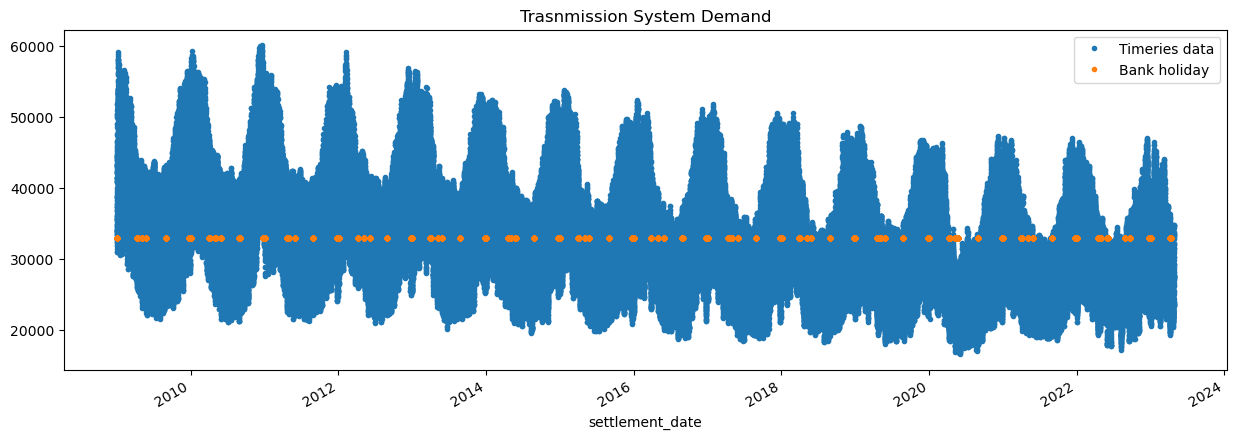

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
data["tsd"].plot(style=".", ax=ax, title="Trasnmission System Demand", label="Timeries data")
(data.query("is_holiday == 1")["is_holiday"] * 33000).plot(style=".", ax=ax, label="Bank holiday")
ax.legend();

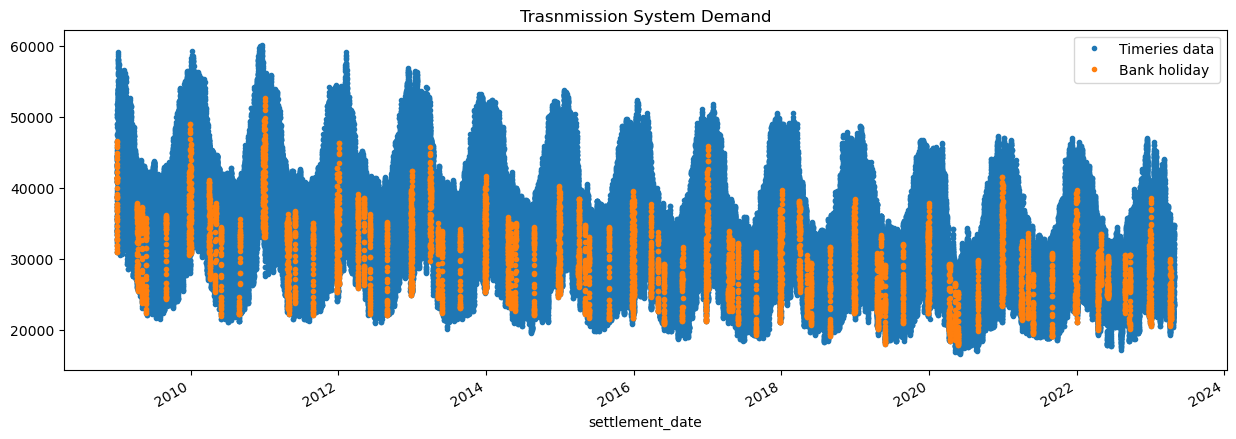

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
data["tsd"].plot(style=".", ax=ax, title="Trasnmission System Demand", label="Timeries data")

(data[data['is_holiday']==1])['tsd'].plot(style=".", ax=ax, label="Bank holiday")
ax.legend();

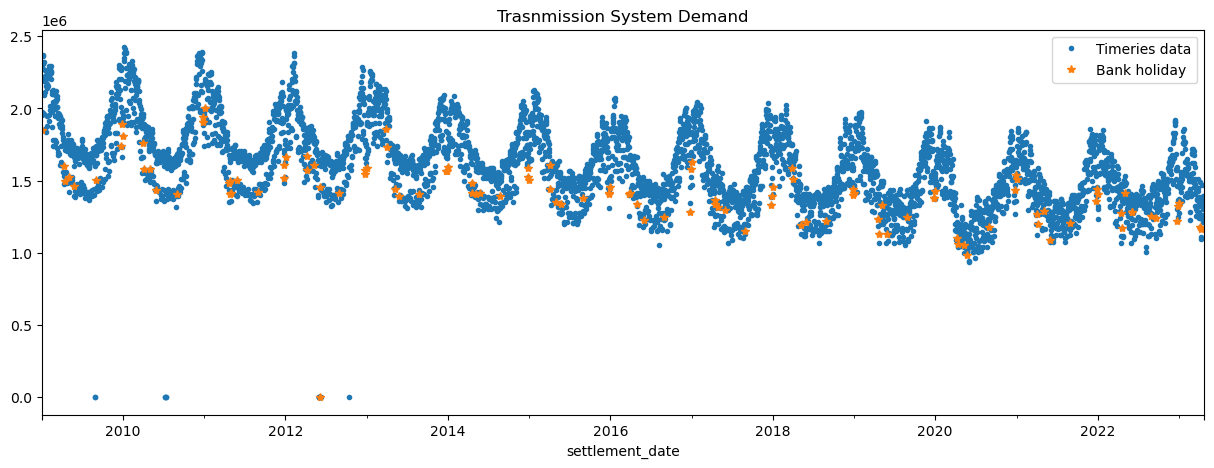

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
summed_data["tsd"].plot(style=".", ax=ax, title="Trasnmission System Demand", label="Timeries data")

(summed_data[summed_data['is_holiday']==1])['tsd'].plot(style="*", ax=ax, label="Bank holiday")
ax.legend();

Now we do a plot for a week.

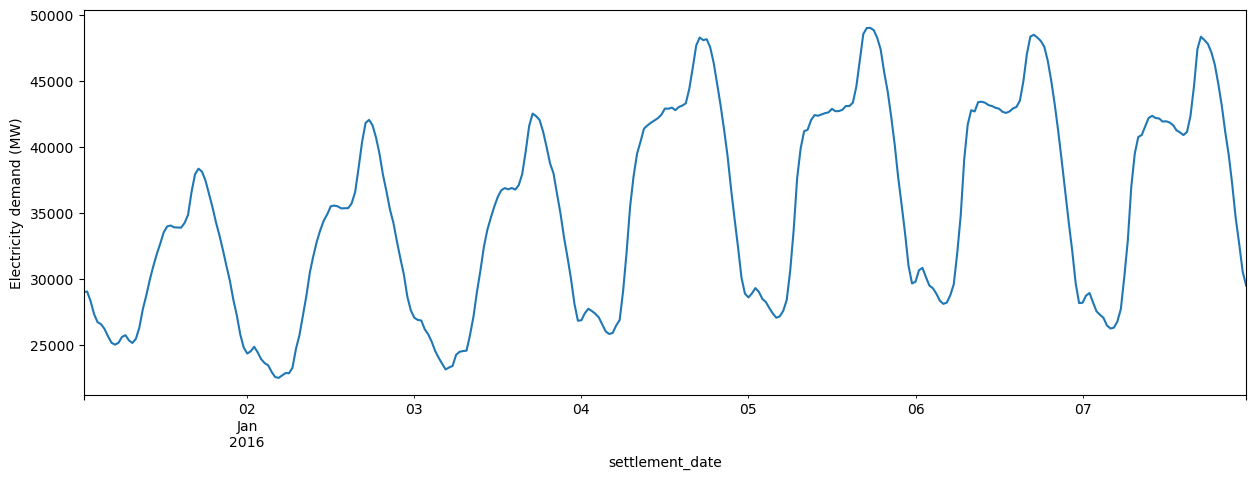

In [10]:
data.loc[(data.index > "01-01-2016") & (data.index < "01-08-2016")]["tsd"].plot(
    figsize=(15, 5), ylabel="Electricity demand (MW)"
);

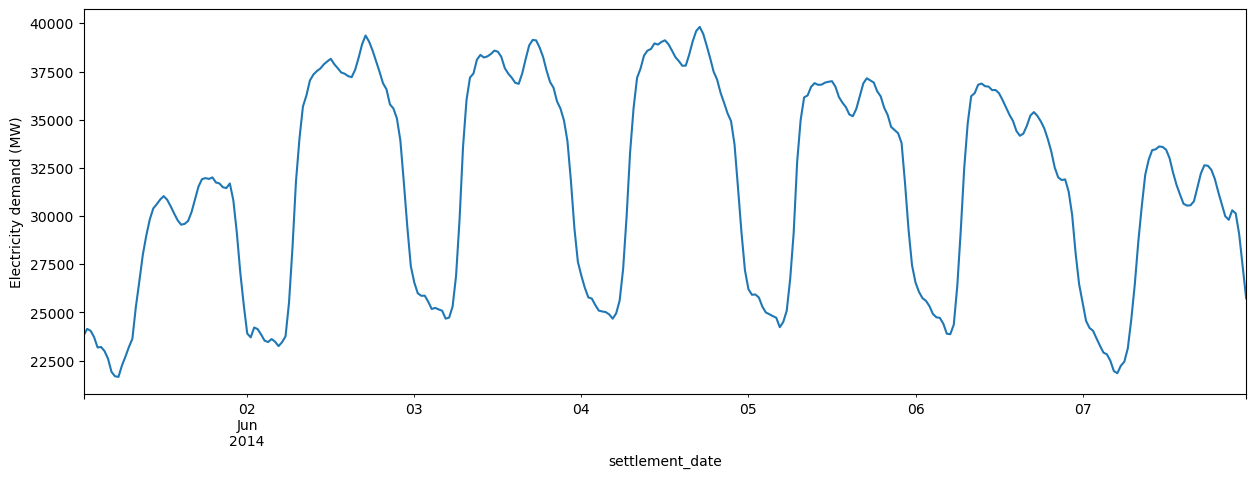

In [11]:
data.loc[(data.index > "06-01-2014") & (data.index < "06-08-2014")]["tsd"].plot(
    figsize=(15, 5), ylabel="Electricity demand (MW)"
);

### Other plots

We will use a function to add more columns so it will be easier to to the plots.

In [12]:
def create_features(df):
    """
    Create time series features based on time series index

    Args:
        - df: time series dataframe

    Returns:
        - df: time series dataframe with new features
    """
    df = df.copy()
    df["day_of_month"] = df.index.day
    df["day_of_week"] = df.index.day_of_week
    df["day_of_year"] = df.index.day_of_year
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["week_of_year"] = df.index.isocalendar().week.astype("int64")
    return df

In [13]:
data = create_features(data)
data

,settlement_period,period_hour,tsd,is_holiday,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year
settlement_date,,,,,,,,,,,
2009-01-01 00:00:00,1,0:00:00,38704,1,1,3,1,1,1,2009,1
2009-01-01 00:30:00,2,0:30:00,38964,1,1,3,1,1,1,2009,1
2009-01-01 01:00:00,3,1:00:00,38651,1,1,3,1,1,1,2009,1
2009-01-01 01:30:00,4,1:30:00,37775,1,1,3,1,1,1,2009,1
2009-01-01 02:00:00,5,2:00:00,37298,1,1,3,1,1,1,2009,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25 21:30:00,44,21:30:00,31142,0,25,1,115,2,4,2023,17
2023-04-25 22:00:00,45,22:00:00,29292,0,25,1,115,2,4,2023,17
2023-04-25 22:30:00,46,22:30:00,27807,0,25,1,115,2,4,2023,17


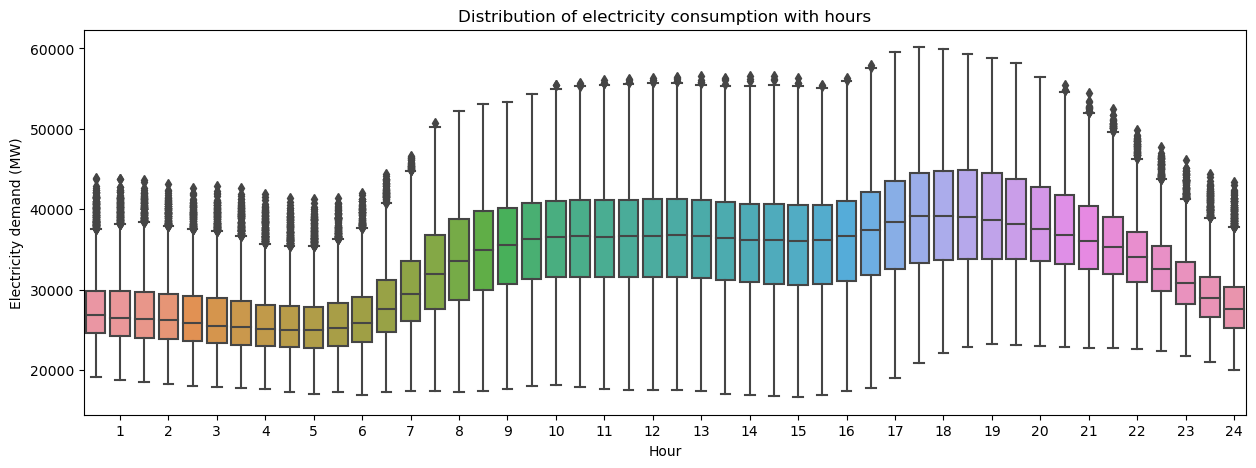

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="settlement_period", y="tsd", data=data)
ax.set_xticks(range(1, 49, 2))
ax.set_xticklabels(range(1, 25))
ax.set_xlabel("Hour")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with hours");

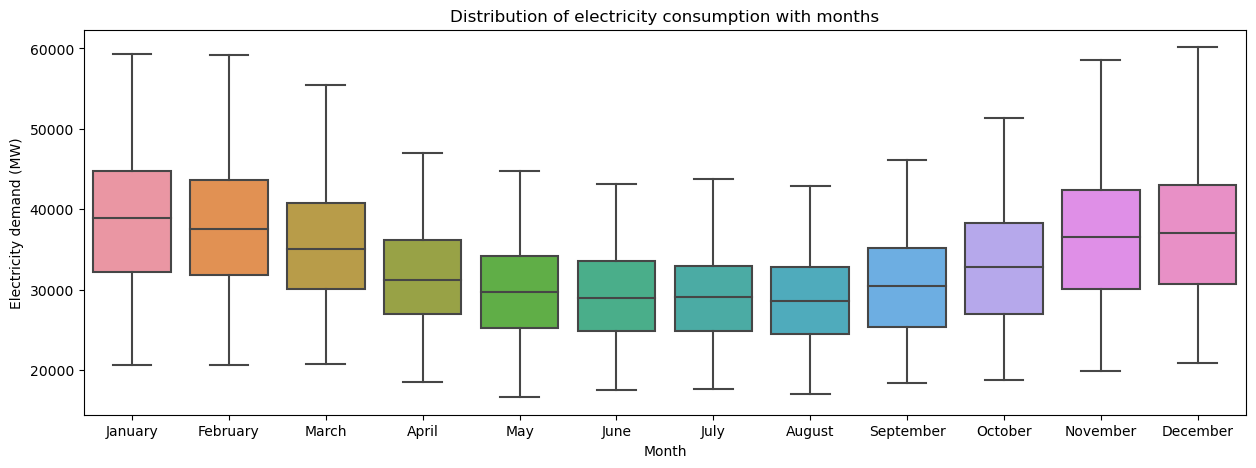

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="month", y="tsd", data=data)

ax.set_xlabel("Month")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with months");
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

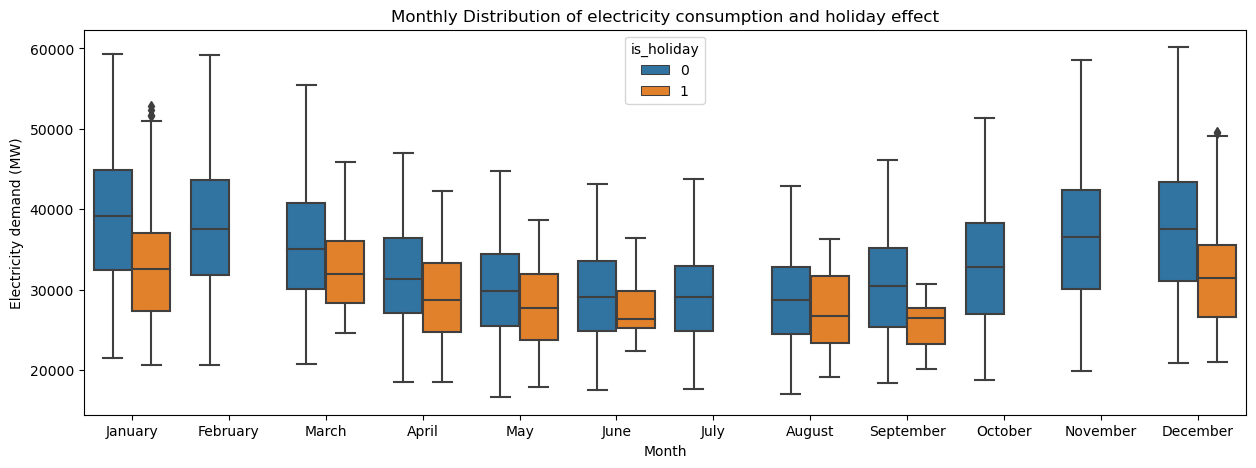

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="month", y="tsd", data=data, hue="is_holiday", ax=ax)

ax.set_xticklabels(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
ax.set_xlabel("Month")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Monthly Distribution of electricity consumption and holiday effect");

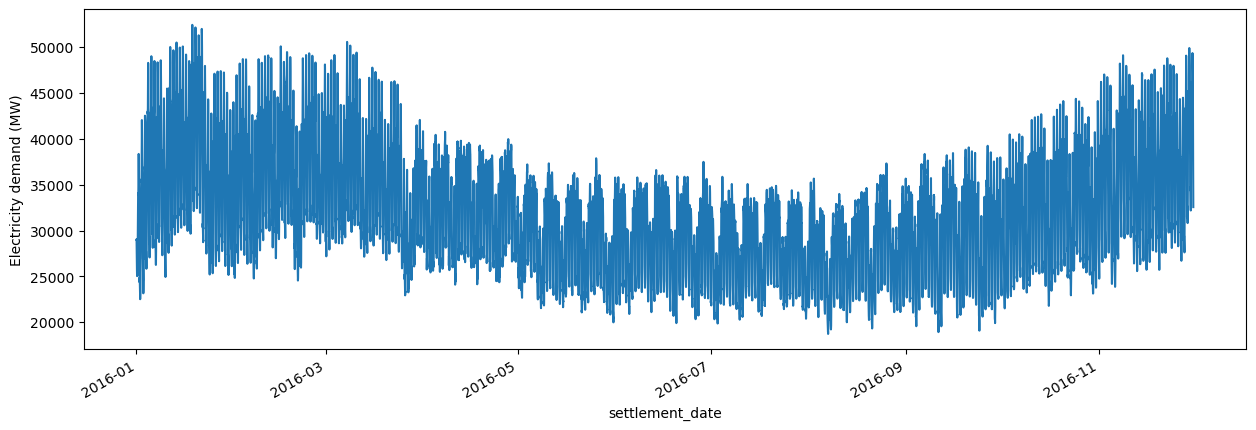

In [17]:
data.loc[(data.index > "01-01-2016") & (data.index < "12-01-2016")]["tsd"].plot(
    figsize=(15, 5), ylabel="Electricity demand (MW)"
);

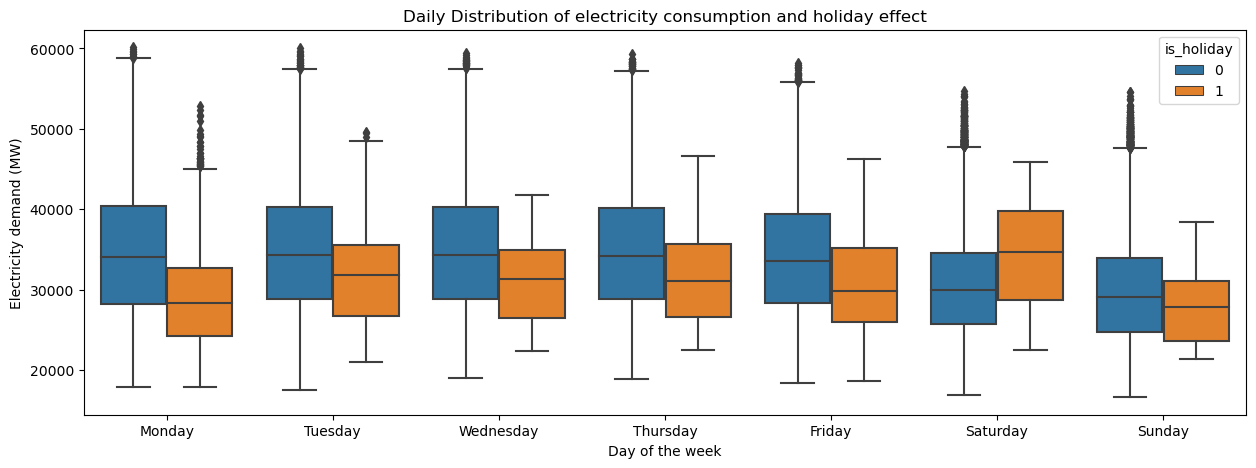

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="day_of_week", y="tsd", data=data, hue="is_holiday", ax=ax)

ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
ax.set_xlabel("Day of the week")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Daily Distribution of electricity consumption and holiday effect");

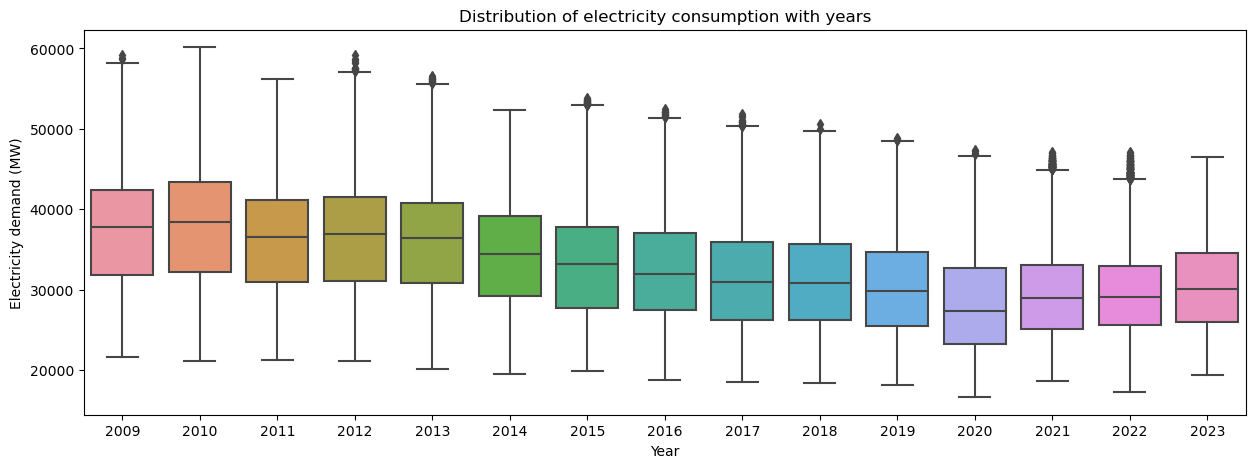

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="year", y="tsd", data=data)

ax.set_xlabel("Year")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with years");

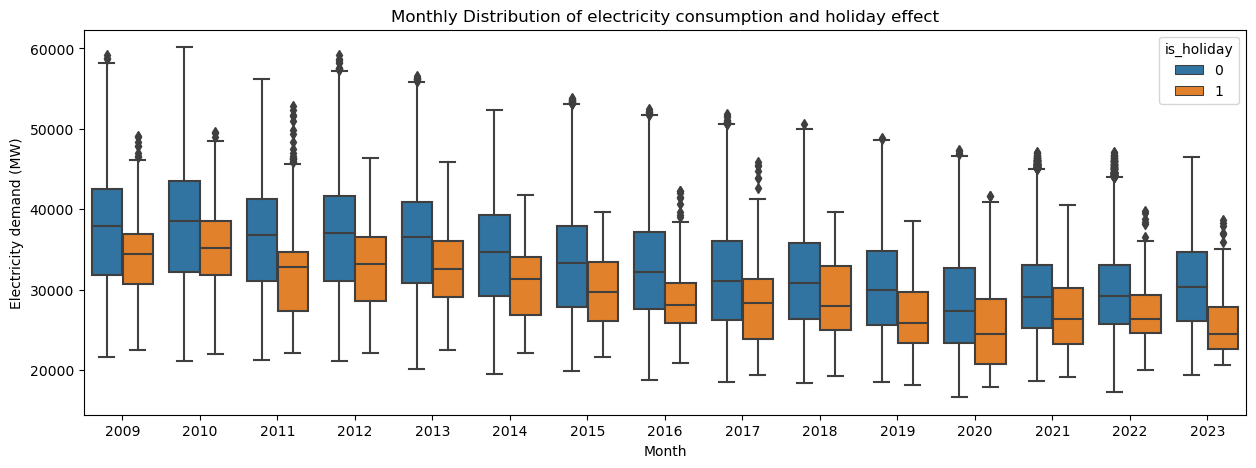

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="year", y="tsd", data=data, hue="is_holiday", ax=ax)

ax.set_xticklabels(range(2009,2024))
ax.set_xlabel("Month")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Monthly Distribution of electricity consumption and holiday effect");

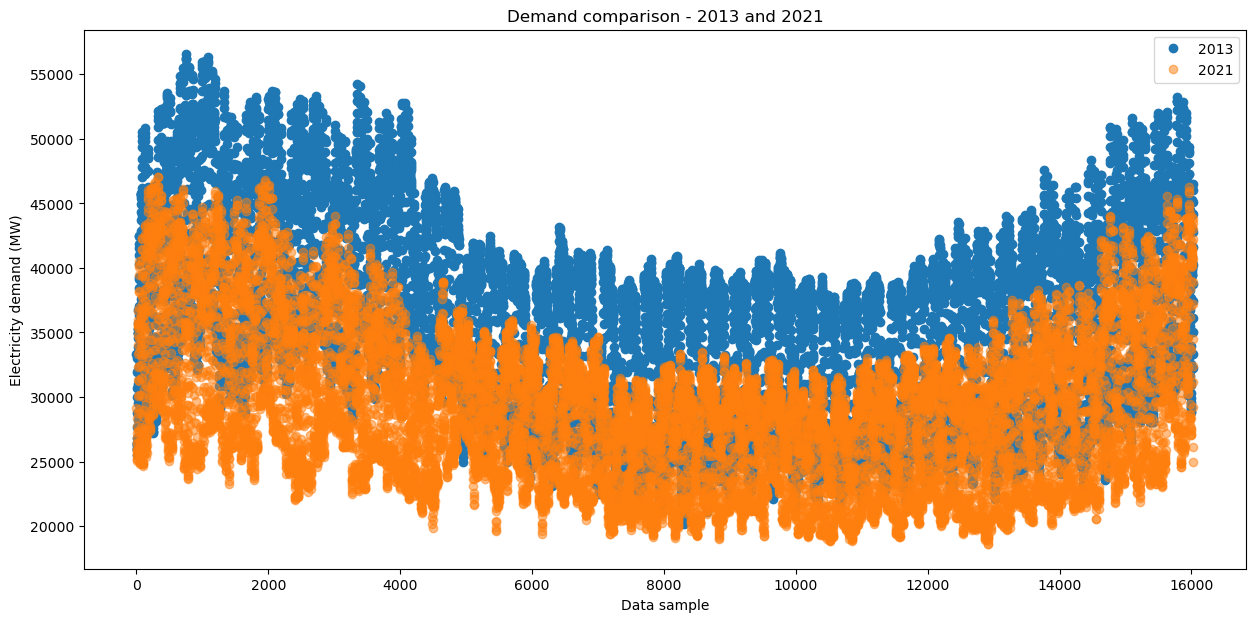

In [21]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(
    range(len(data.loc[(data.index > "01-01-2013") & (data.index < "12-01-2013")]["tsd"])),
    data.loc[(data.index > "01-01-2013") & (data.index < "12-01-2013")]["tsd"],
    "o",
    label="2013",
)

ax.plot(
    range(len(data.loc[(data.index > "01-01-2021") & (data.index < "12-01-2021")]["tsd"])),
    data.loc[(data.index > "01-01-2021") & (data.index < "12-01-2021")]["tsd"],
    "o",
    alpha=0.5,
    label="2021",
)
ax.set_xlabel("Data sample")
ax.set_ylabel("Electricity demand (MW)")
ax.legend(loc="best")
ax.set_title("Demand comparison - 2013 and 2021");

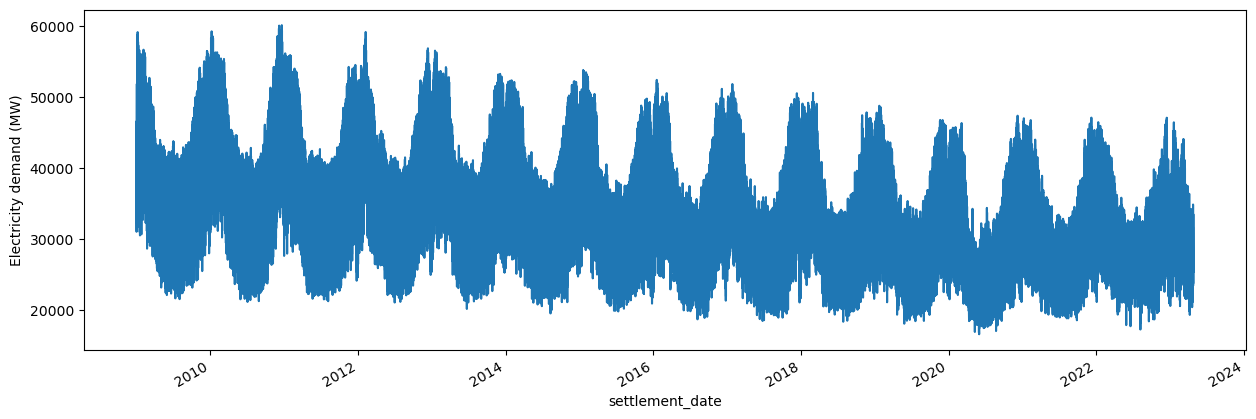

In [22]:
data["tsd"].plot(
    figsize=(15, 5), ylabel="Electricity demand (MW)"
);